In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 
import matplotlib.patches as mpatches
import re
from unidecode import unidecode

In [2]:
df = pd.read_json("dataV3.json")
df.shape

(7560, 29)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ano de Edição        3466 non-null   float64
 1   Colaborador          5077 non-null   object 
 2   Editora              5051 non-null   object 
 3   ISBN                 7228 non-null   object 
 4   Ano                  4997 non-null   float64
 5   Edição               4871 non-null   float64
 6   Origem               5075 non-null   object 
 7   Formato              5036 non-null   object 
 8   Encadernação         7196 non-null   object 
 9   Idioma               6291 non-null   object 
 10  País                 4974 non-null   object 
 11  Páginas              7053 non-null   float64
 12  Assunto              349 non-null    object 
 13  preço                7560 non-null   float64
 14  nome                 7560 non-null   object 
 15  categoria            7560 non-null   o

In [4]:
# Parâmetros para desenhar gráficos
k = int(1 + 3.3 * math.log10(df.shape[0])) #Quantidade ideal de bins no histogram
plt.rcParams["figure.figsize"] = (12, 7)

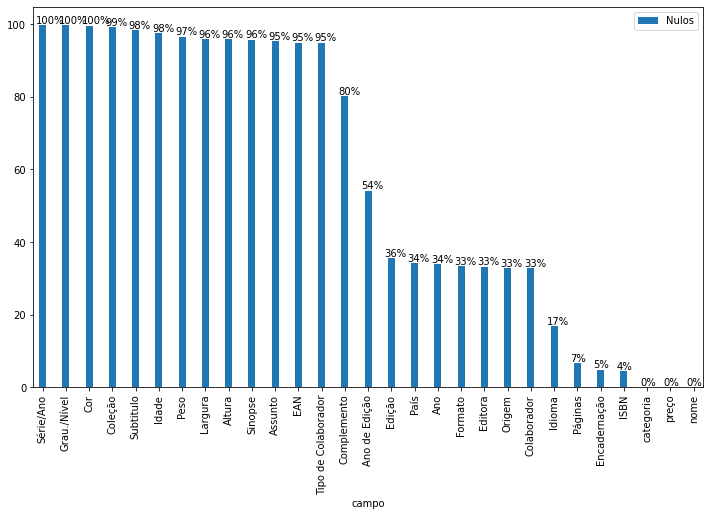

In [5]:
total = df.shape[0]
data = pd.DataFrame({},columns=["campo","Não nulos","Nulos"])
for i,campo in enumerate(df) :
    qtd_null = df[df[campo].isna()].shape[0]
    row = [campo,100,(qtd_null*100)/total]
    data.loc[i] = row

data = data.sort_values(by="Nulos",ascending=False)

g = data.plot.bar(x='campo',y='Nulos',align='center', width=0.3)
for index,value in enumerate(data['Nulos']):
    plt.text(index-0.3,value+0.5,f"{value:.0f}%")
plt.show()

# Remove campos incomuns aos registros

In [6]:
campos_desnecessarios = ['Assunto','Idade','Tipo de Colaborador','EAN','Sinopse','Altura','Largura','Peso','Subtitulo','Grau./Nível','Série/Ano','Cor','Coleção']
df = df.drop(campos_desnecessarios,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ano de Edição  3466 non-null   float64
 1   Colaborador    5077 non-null   object 
 2   Editora        5051 non-null   object 
 3   ISBN           7228 non-null   object 
 4   Ano            4997 non-null   float64
 5   Edição         4871 non-null   float64
 6   Origem         5075 non-null   object 
 7   Formato        5036 non-null   object 
 8   Encadernação   7196 non-null   object 
 9   Idioma         6291 non-null   object 
 10  País           4974 non-null   object 
 11  Páginas        7053 non-null   float64
 12  preço          7560 non-null   float64
 13  nome           7560 non-null   object 
 14  categoria      7560 non-null   object 
 15  Complemento    1494 non-null   object 
dtypes: float64(5), object(11)
memory usage: 945.1+ KB


## Será que o campo complemento impácta no preço?

In [7]:
df['Complemento'].value_counts()

NENHUM               1460
CD-AUDIO               17
LIVRO                   9
CD-ROM                  4
DVD-ROM                 2
BRINDE                  1
CARTÕES DE ACESSO       1
Name: Complemento, dtype: int64

<AxesSubplot:xlabel='Complemento', ylabel='preço'>

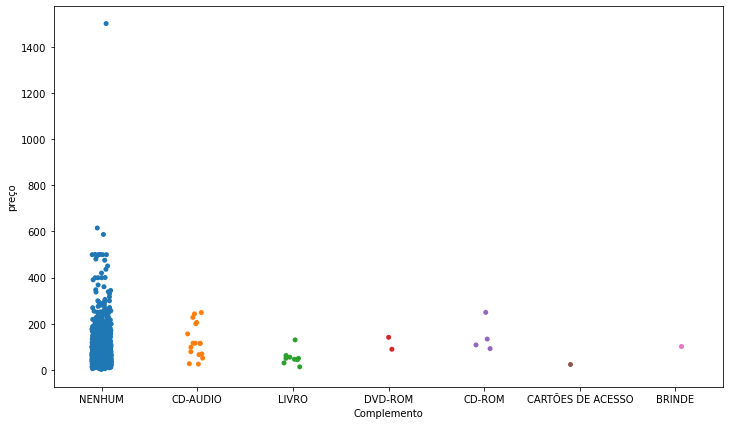

In [8]:
sns.stripplot(x="Complemento", y="preço", data=df)

### Complemento parece não importar muito para o preço

In [9]:
df = df.drop("Complemento",axis=1)

In [10]:
df.nunique()

Ano de Edição      45
Colaborador      4373
Editora           758
ISBN             7190
Ano                46
Edição             61
Origem              3
Formato             8
Encadernação       13
Idioma             11
País               11
Páginas           670
preço            1830
nome             7455
categoria          41
dtype: int64

# Verificando valores nulos para os campos

## Qual o percentual de nulos para cada campo?

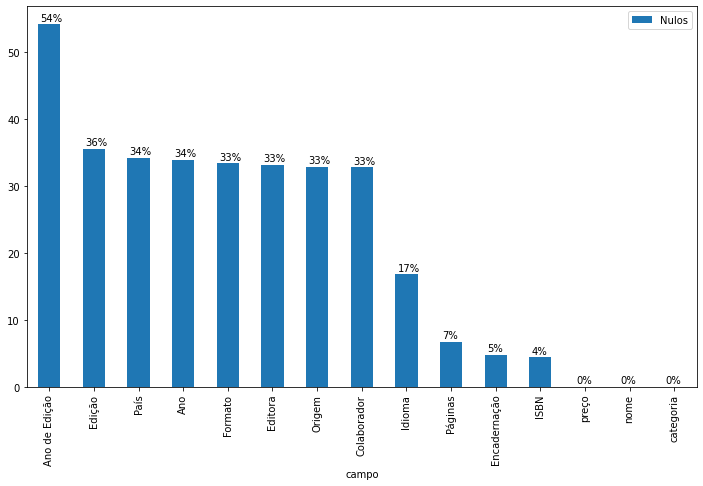

In [11]:
total = df.shape[0]
data = pd.DataFrame({},columns=["campo","Não nulos","Nulos"])
for i,campo in enumerate(df) :
    qtd_null = df[df[campo].isna()].shape[0]
    row = [campo,100,(qtd_null*100)/total]
    data.loc[i] = row

data = data.sort_values(by="Nulos",ascending=False)

g = data.plot.bar(x='campo',y='Nulos')
for index,value in enumerate(data['Nulos']):
    plt.text(index-0.2,value+0.5,f"{value:.0f}%")
plt.show()

## Qual a diferença entre Ano e Ano de Edição

In [12]:
nao_nulos = df[(df['Ano de Edição'].notna()) & (df['Ano'].notna())].shape[0]
iguais = df[(df['Ano'] == df['Ano de Edição']) & (df['Ano de Edição'].notna()) & (df['Ano'].notna()) ][['Ano','Ano de Edição']]
print(f"{(iguais.shape[0] * 100)/nao_nulos:.2f}% dos campos não nulos de Ano e Ano de Edição são iguais")

98.81% dos campos não nulos de Ano e Ano de Edição são iguais


In [13]:
total = df.shape[0]
tem_ano_ed = df[(df['Ano de Edição'].notna()) & (df['Ano'].isna())]
tem_ano = df[(df['Ano'].notna()) & (df['Ano de Edição'].isna())]
nenhum = df[(df['Ano'].isna()) & (df['Ano de Edição'].isna())]
os_dois = df[(df['Ano'].notna()) & (df['Ano de Edição'].notna())]
print(f"{(tem_ano_ed.shape[0] * 100)/total:.2f}% casos possuem Ano de Edição, mas não Ano.\n{(tem_ano.shape[0] * 100)/total:.2f}% casos possuem Ano, mas não Ano de Edição.\n{(nenhum.shape[0] * 100)/total:.2f}% casos possuem nenhum.\n{(os_dois.shape[0] * 100)/total:.2f}% casos possuem os dois.")

0.32% casos possuem Ano de Edição, mas não Ano.
20.57% casos possuem Ano, mas não Ano de Edição.
33.58% casos possuem nenhum.
45.53% casos possuem os dois.


### Ano e Ano de Edição parecem a mesma informação, apesar que algumas diferenças, então neste caso será desprezado o Ano de Edição

In [14]:

df = df.drop('Ano de Edição',axis=1)

In [15]:
#Cria dataset bruto, sem inferências de nulos
df_raw = df.copy()
df_raw = df_raw.dropna()

## Tratando nulos para edição

In [16]:
df['Edição'].value_counts()

1.0       4442
2.0         94
3.0         28
2020.0      20
4.0         19
          ... 
2005.0       1
57.0         1
39.0         1
34.0         1
55.0         1
Name: Edição, Length: 61, dtype: int64

### A esmagadora maiora parece ser 1 (primeira edição), então parece ser razoável que um livro de edição desconhecida seja sua primeira edição

In [17]:
df['Edição'] = df['Edição'].fillna(1).astype(int)
df['Edição'].value_counts()

1       7131
2         94
3         28
2020      20
4         19
        ... 
55         1
2002       1
62         1
26         1
1999       1
Name: Edição, Length: 61, dtype: int64

## O Ano é relevante para o preço?

<AxesSubplot:xlabel='Ano', ylabel='preço'>

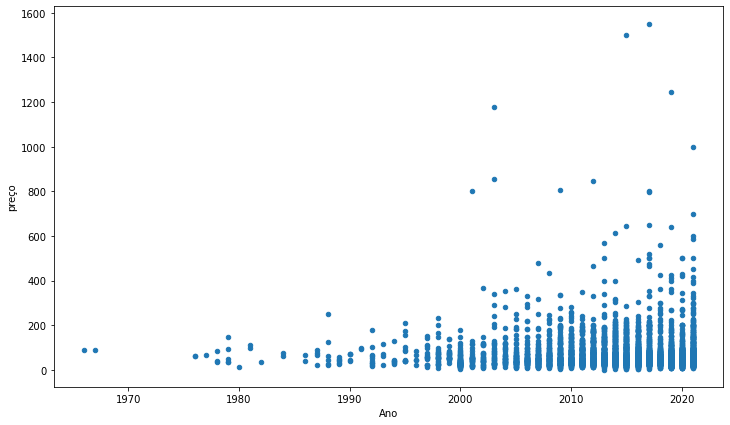

In [18]:
df.plot.scatter("Ano","preço")

<AxesSubplot:>

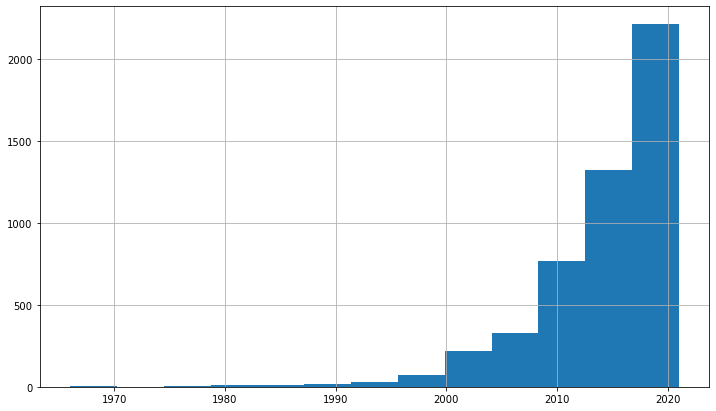

In [19]:
df["Ano"].hist(bins=k)

## Ano parece ser relevante para o preço. Qual a melhor alternativa para tratar anos nulos?

### Setando para valores 0

<AxesSubplot:xlabel='Ano', ylabel='preço'>

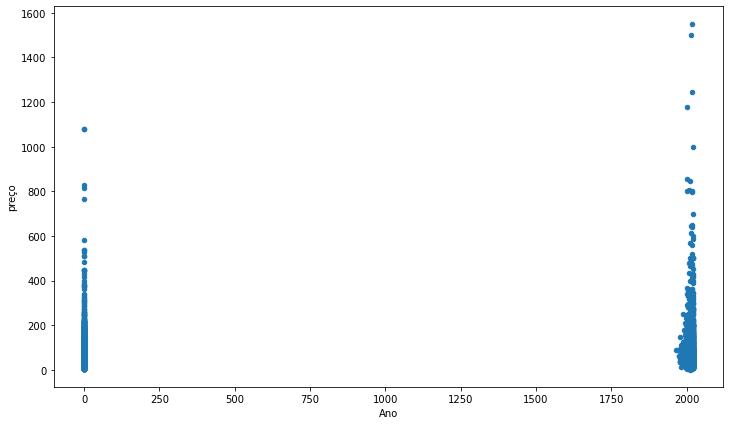

In [20]:
df1 = df.copy()
df1["Ano"] = df1["Ano"].fillna(0)
df1.plot.scatter("Ano","preço")

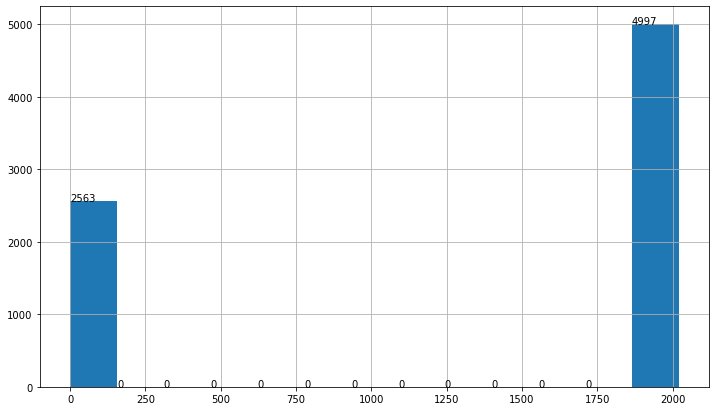

In [21]:
test = df1["Ano"].hist(bins=k)
for i in test.patches:
    plt.text(i.xy[0],i._y1,f'{i._y1:.0f}')
plt.show()

### Setando para média

Ano médio 2014


<AxesSubplot:xlabel='Ano', ylabel='preço'>

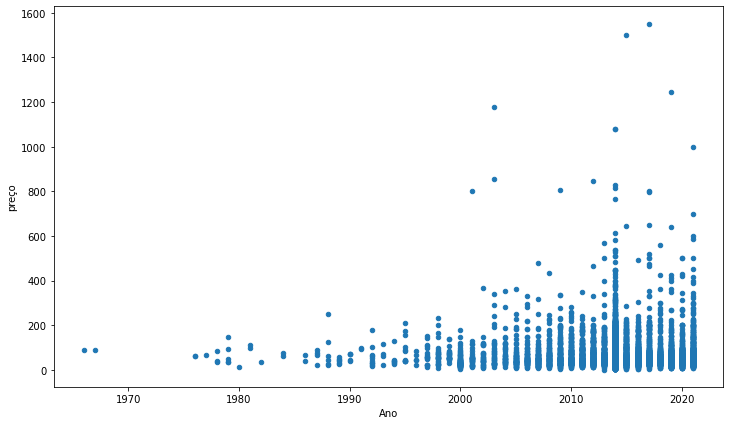

In [22]:
df2 = df.copy()
df2["Ano"] = df2["Ano"].fillna(int(df2["Ano"].mean()))
print(f"Ano médio {df2['Ano'].mean():.0f}")
df2.plot.scatter("Ano","preço")

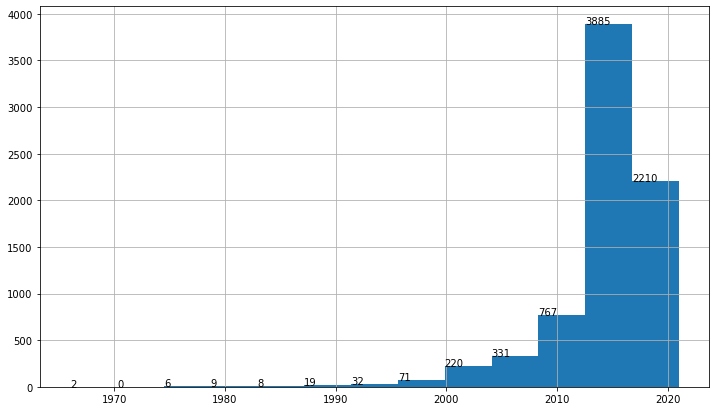

In [23]:
test = df2["Ano"].hist(bins=k)
for i in test.patches:
    plt.text(i.xy[0],i._y1,f'{i._y1:.0f}')
plt.show()

### E se tentar usar o ano médio da editora?

<AxesSubplot:xlabel='Ano', ylabel='preço'>

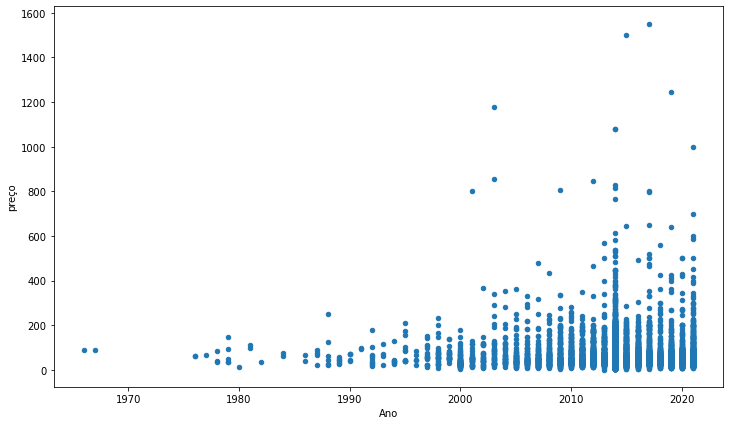

In [24]:
df3 = df.copy()
ano_edicao_media_editora = df3.groupby(by="Editora")["Ano"].mean()
media = int(df3["Ano"].mean())
ano_edicao_media_editora = ano_edicao_media_editora.fillna(media)
ano_edicao_media_editora = ano_edicao_media_editora.astype(int)
for index,row in df3.iterrows():
    if np.isnan(df3.loc[index,"Ano"]):
        if df3.loc[index,"Editora"] in ano_edicao_media_editora:
            # print(f"1-Vai trocar {df3.loc[index,'Ano']} por {ano_edicao_media_editora[df3.loc[index,'Editora']]}")
            df3.loc[index,"Ano"] = ano_edicao_media_editora[df3.loc[index,"Editora"]]
        else:
            # print(f"2-Vai trocar {df3.loc[index,'Ano']} por {media}")
            df3.loc[index,"Ano"] = media
df3.plot.scatter("Ano","preço")

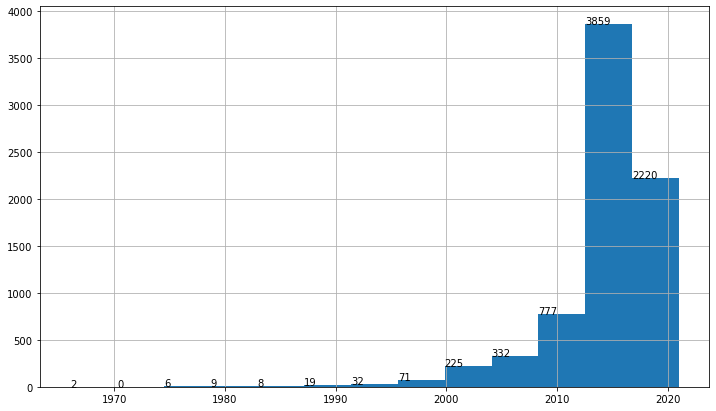

In [25]:
test = df3["Ano"].hist(bins=k)
for i in test.patches:
    plt.text(i.xy[0],i._y1,f'{i._y1:.0f}')
plt.show()

## Utilizar a média por editora parece se aproximar mais (mesmo que por pouco) do original


In [26]:
df = df3
df['Ano'] = df['Ano'].astype(int)

## Parecem haver muitras editoras, quais são as principais:

In [27]:
df['Editora'].unique()

array(['GALERA RECORD', 'GLOBO LIVROS', 'GLOBAL EDITORA',
       'PLANETA DO BRASIL', 'USBORNE', 'ROCCO -', 'NOVA FRONTEIRA -',
       'COBOGO', 'GIRASSOL', nan, 'ALTA BOOKS -', 'PAPIRUS-', 'EDIPRO',
       'LEYA', 'PRUMO', 'HOUGHTON MIFFLIN SCH', 'GUTENBERG AUTENTICA',
       'VOZES', 'SARAIVA EDITORA -', 'SEGUINTE', 'WMF MARTINS FONTES',
       'GARAMOND', 'CIENCIA MODERNA', 'BOOKMAN COMPANHIA ED',
       'SUMA DE LETRAS BRASI', 'CIA DAS LETRINHAS', 'SUMMUS', 'RECORD',
       'MELHORAMENTOS -', 'HOO EDITORA', 'COMPANHIA DE BOLSO', 'ZAHAR -',
       'JOHN WILEY TRADE', 'OUTRO PLANETA', 'COM ARTE',
       'AUTÊNTICA INFANTIL', 'ROCCO JOVENS LEITORE', 'CHIADO BRASIL',
       'INTRINSECA', 'CONTEXTO', 'BIBLIOLIFE', 'HUCITEC EDITORA',
       'COMPANHIA DAS LETRAS', 'PAZ E TERRA', 'VIDE EDITORIAL', 'UNESP',
       'NOVO SECULO', 'VIA LEITURA', 'PLATAFORMA 21', 'FARO EDITORIAL',
       'JOANA CORTES', 'VALERIA BORGES', 'FARIA E SILVA (EB)',
       'LETRAS DO BRASIL', 'M.BOOKS', 'DAVID BROWN

### Existe sujeira com " -" no final do nome de algumas editoras

In [28]:
def limparEditoras(df):
    for i,row in df[df['Editora'].notna()].iterrows():
        value = str(re.sub(" -$","",row['Editora']).strip())
        value = str(re.sub("-$","",row['Editora']).strip())
        df.loc[i,'Editora'] = value

In [29]:
limparEditoras(df)
limparEditoras(df_raw)

In [30]:
df['Editora'].unique()

array(['GALERA RECORD', 'GLOBO LIVROS', 'GLOBAL EDITORA',
       'PLANETA DO BRASIL', 'USBORNE', 'ROCCO', 'NOVA FRONTEIRA',
       'COBOGO', 'GIRASSOL', nan, 'ALTA BOOKS', 'PAPIRUS', 'EDIPRO',
       'LEYA', 'PRUMO', 'HOUGHTON MIFFLIN SCH', 'GUTENBERG AUTENTICA',
       'VOZES', 'SARAIVA EDITORA', 'SEGUINTE', 'WMF MARTINS FONTES',
       'GARAMOND', 'CIENCIA MODERNA', 'BOOKMAN COMPANHIA ED',
       'SUMA DE LETRAS BRASI', 'CIA DAS LETRINHAS', 'SUMMUS', 'RECORD',
       'MELHORAMENTOS', 'HOO EDITORA', 'COMPANHIA DE BOLSO', 'ZAHAR',
       'JOHN WILEY TRADE', 'OUTRO PLANETA', 'COM ARTE',
       'AUTÊNTICA INFANTIL', 'ROCCO JOVENS LEITORE', 'CHIADO BRASIL',
       'INTRINSECA', 'CONTEXTO', 'BIBLIOLIFE', 'HUCITEC EDITORA',
       'COMPANHIA DAS LETRAS', 'PAZ E TERRA', 'VIDE EDITORIAL', 'UNESP',
       'NOVO SECULO', 'VIA LEITURA', 'PLATAFORMA 21', 'FARO EDITORIAL',
       'JOANA CORTES', 'VALERIA BORGES', 'FARIA E SILVA (EB)',
       'LETRAS DO BRASIL', 'M.BOOKS', 'DAVID BROWN BOOK CO', 'B

In [31]:
top10_editoras = df['Editora'].value_counts()[0:10]
top10_editoras

COMPANHIA DAS LETRAS    167
MADRAS                  142
SEXTANTE                115
ALTA BOOKS              102
VOZES                   100
CONTEXTO                 99
SARAIVA EDITORA          91
ROCCO                    90
RECORD                   69
INTRINSECA               68
Name: Editora, dtype: int64

In [32]:
total_editoras = df[df['Editora'].isna()].shape[0]
print(f"{(total_editoras*100)/df.shape[0]:.2f}% ({total_editoras}/{df.shape[0]}) são não nulas")

33.19% (2509/7560) são não nulas


In [33]:
qtd = len(df[df["Editora"].isin(list(top10_editoras.keys()))])
percentual = ((qtd * 100) / total_editoras)
print(f"As principais editoras publicaram {percentual:.2f}%({qtd}/{total_editoras})")

As principais editoras publicaram 41.57%(1043/2509)


In [34]:
df['Editora'] = df['Editora'].fillna("Outra")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Colaborador   5077 non-null   object 
 1   Editora       7560 non-null   object 
 2   ISBN          7228 non-null   object 
 3   Ano           7560 non-null   int64  
 4   Edição        7560 non-null   int64  
 5   Origem        5075 non-null   object 
 6   Formato       5036 non-null   object 
 7   Encadernação  7196 non-null   object 
 8   Idioma        6291 non-null   object 
 9   País          4974 non-null   object 
 10  Páginas       7053 non-null   float64
 11  preço         7560 non-null   float64
 12  nome          7560 non-null   object 
 13  categoria     7560 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 827.0+ KB


## Tratando idiomas e paises nulos

In [35]:
df['País'].unique()

array(['BRASIL', nan, 'ESTADOS UNIDOS', 'PORTUGAL', 'FRANÇA',
       'INGLATERRA', 'ALEMANHA', 'ESPANHA', 'ARGENTINA', 'ITALIA',
       'HOLANDA', 'MEXICO'], dtype=object)

In [36]:
df['Idioma'].unique()

array(['PORTUGUÊS', nan, 'Português', 'INGLÊS', 'PORT. PORTUGAL', 'ING',
       'ESPANHOL', 'SPA', 'FRANCÊS', 'ITALIANO', 'JAPONÊS', 'ALEMÃO'],
      dtype=object)

### ING é abreviação para INGLÊS e SPA para ESPANHOL

In [37]:
df['Idioma'].replace({'ING':'INGLÊS','SPA':'ESPANHOL'},inplace=True)
df_raw['Idioma'].replace({'ING':'INGLÊS','SPA':'ESPANHOL'},inplace=True)
df['Idioma'].unique()

array(['PORTUGUÊS', nan, 'Português', 'INGLÊS', 'PORT. PORTUGAL',
       'ESPANHOL', 'FRANCÊS', 'ITALIANO', 'JAPONÊS', 'ALEMÃO'],
      dtype=object)

In [38]:
df["País"] = df['País'].str.upper()
df_raw["País"] = df_raw['País'].str.upper()
df["Idioma"] = df['Idioma'].str.upper()
df_raw["Idioma"] = df_raw['Idioma'].str.upper()
print(f"Qtd. Paises únicos: {df['País'].nunique()}")
print(f"Qtd. Idiomas únicos: {df['Idioma'].nunique()}")
df[["País",'Idioma']].drop_duplicates()

Qtd. Paises únicos: 11
Qtd. Idiomas únicos: 8


País          Idioma
0             BRASIL       PORTUGUÊS
9             BRASIL             NaN
13               NaN       PORTUGUÊS
31               NaN          INGLÊS
57    ESTADOS UNIDOS          INGLÊS
68    ESTADOS UNIDOS             NaN
122              NaN             NaN
213         PORTUGAL  PORT. PORTUGAL
221           FRANÇA             NaN
226           FRANÇA       PORTUGUÊS
233       INGLATERRA          INGLÊS
294         ALEMANHA             NaN
327          ESPANHA             NaN
474          ESPANHA        ESPANHOL
486           BRASIL        ESPANHOL
500           FRANÇA         FRANCÊS
588         PORTUGAL             NaN
739           BRASIL        ITALIANO
824       INGLATERRA             NaN
831         ALEMANHA          INGLÊS
1001          BRASIL          INGLÊS
1459          BRASIL         JAPONÊS
1464       ARGENTINA             NaN
1607        PORTUGAL       PORTUGUÊS
2388        PORTUGAL          INGLÊS
3207             NaN  PORT. PORTUGAL
3711  ESTADOS UNIDOS          ALEMÃO
3743         ESPANHA  PORT. PORTUGAL
3745        ALEMANHA       PORTUGUÊS
3802         ESPANHA          INGLÊS
3803          ITALIA        ITALIANO
3899         HOLANDA             NaN
3996          MEXICO             NaN
4792        ALEMANHA          ALEMÃO
4822          BRASIL  PORT. PORTUGAL
5075          MEXICO       PORTUGUÊS

In [39]:
df[["País",'Idioma']].drop_duplicates().dropna()

País          Idioma
0             BRASIL       PORTUGUÊS
57    ESTADOS UNIDOS          INGLÊS
213         PORTUGAL  PORT. PORTUGAL
226           FRANÇA       PORTUGUÊS
233       INGLATERRA          INGLÊS
474          ESPANHA        ESPANHOL
486           BRASIL        ESPANHOL
500           FRANÇA         FRANCÊS
739           BRASIL        ITALIANO
831         ALEMANHA          INGLÊS
1001          BRASIL          INGLÊS
1459          BRASIL         JAPONÊS
1607        PORTUGAL       PORTUGUÊS
2388        PORTUGAL          INGLÊS
3711  ESTADOS UNIDOS          ALEMÃO
3743         ESPANHA  PORT. PORTUGAL
3745        ALEMANHA       PORTUGUÊS
3802         ESPANHA          INGLÊS
3803          ITALIA        ITALIANO
4792        ALEMANHA          ALEMÃO
4822          BRASIL  PORT. PORTUGAL
5075          MEXICO       PORTUGUÊS

In [40]:
idiomas_por_pais = df.groupby(by=['País','Idioma']).size().reset_index(name='counts')
idiomas_por_pais

País          Idioma  counts
0         ALEMANHA          ALEMÃO       1
1         ALEMANHA          INGLÊS       6
2         ALEMANHA       PORTUGUÊS       3
3           BRASIL        ESPANHOL       6
4           BRASIL          INGLÊS      22
5           BRASIL        ITALIANO       3
6           BRASIL         JAPONÊS       1
7           BRASIL  PORT. PORTUGAL       1
8           BRASIL       PORTUGUÊS    3835
9          ESPANHA        ESPANHOL      13
10         ESPANHA          INGLÊS       1
11         ESPANHA  PORT. PORTUGAL       1
12  ESTADOS UNIDOS          ALEMÃO       1
13  ESTADOS UNIDOS          INGLÊS      59
14          FRANÇA         FRANCÊS       6
15          FRANÇA       PORTUGUÊS       1
16      INGLATERRA          INGLÊS      36
17          ITALIA        ITALIANO       1
18          MEXICO       PORTUGUÊS       1
19        PORTUGAL          INGLÊS       2
20        PORTUGAL  PORT. PORTUGAL      14
21        PORTUGAL       PORTUGUÊS       4

### Será inferido o Idioma com base no País

In [41]:
melhor_idioma_por_pais = {}
for pais in idiomas_por_pais['País'].drop_duplicates():
    df1 = idiomas_por_pais[idiomas_por_pais['País'] == pais]
    melhor = idiomas_por_pais[idiomas_por_pais['País'] == pais]['counts'].max()
    melhor_idioma_por_pais[pais] = df1[df1['counts'] == melhor]['Idioma'].item()
melhor_idioma_por_pais

{'ALEMANHA': 'INGLÊS',
 'BRASIL': 'PORTUGUÊS',
 'ESPANHA': 'ESPANHOL',
 'ESTADOS UNIDOS': 'INGLÊS',
 'FRANÇA': 'FRANCÊS',
 'INGLATERRA': 'INGLÊS',
 'ITALIA': 'ITALIANO',
 'MEXICO': 'PORTUGUÊS',
 'PORTUGAL': 'PORT. PORTUGAL'}

In [42]:
print( df[df['Idioma'].isna()].shape[0])
for i,row in df[df['Idioma'].isna() & df['País'].notna()].iterrows():
    if row['País'] in melhor_idioma_por_pais:
        df.loc[i,'Idioma'] = melhor_idioma_por_pais[row['País']]
print( df[df['Idioma'].isna()].shape[0])

1269
317


### Será inferido País por Idioma

In [43]:
pais_por_idiomas = df.groupby(by=['Idioma','País']).size().reset_index(name='counts')
pais_por_idiomas

Idioma            País  counts
0           ALEMÃO        ALEMANHA       1
1           ALEMÃO  ESTADOS UNIDOS       1
2         ESPANHOL          BRASIL       6
3         ESPANHOL         ESPANHA      42
4          FRANCÊS          FRANÇA      11
5           INGLÊS        ALEMANHA      12
6           INGLÊS          BRASIL      22
7           INGLÊS         ESPANHA       1
8           INGLÊS  ESTADOS UNIDOS      87
9           INGLÊS      INGLATERRA      52
10          INGLÊS        PORTUGAL       2
11        ITALIANO          BRASIL       3
12        ITALIANO          ITALIA       1
13         JAPONÊS          BRASIL       1
14  PORT. PORTUGAL          BRASIL       1
15  PORT. PORTUGAL         ESPANHA       1
16  PORT. PORTUGAL        PORTUGAL      22
17       PORTUGUÊS        ALEMANHA       3
18       PORTUGUÊS          BRASIL    4693
19       PORTUGUÊS          FRANÇA       1
20       PORTUGUÊS          MEXICO       3
21       PORTUGUÊS        PORTUGAL       4

In [44]:
melhor_pais_por_idioma = {}
for pais in pais_por_idiomas['Idioma'].drop_duplicates():
    df1 = pais_por_idiomas[pais_por_idiomas['Idioma'] == pais]
    melhor = pais_por_idiomas[pais_por_idiomas['Idioma'] == pais]['counts'].max()
    if df1[df1['counts'] == melhor]['País'].shape[0] == 1:
        nome_pais = df1[df1['counts'] == melhor]['País'].item()
    else:
        nome_pais = df1[df1['counts'] == melhor]['País'][0]
    melhor_pais_por_idioma[pais] = nome_pais
melhor_pais_por_idioma

{'ALEMÃO': 'ALEMANHA',
 'ESPANHOL': 'ESPANHA',
 'FRANCÊS': 'FRANÇA',
 'INGLÊS': 'ESTADOS UNIDOS',
 'ITALIANO': 'BRASIL',
 'JAPONÊS': 'BRASIL',
 'PORT. PORTUGAL': 'PORTUGAL',
 'PORTUGUÊS': 'BRASIL'}

In [45]:
print(df[df['País'].isna()].shape[0])
for i,row in df[df['País'].isna() & df['Idioma'].notna()].iterrows():
    if row['Idioma'] in melhor_pais_por_idioma:
        df.loc[i,'País'] = melhor_pais_por_idioma[row['Idioma']]
print( df[df['País'].isna()].shape[0])

2586
313


### Como ficou o resultado?

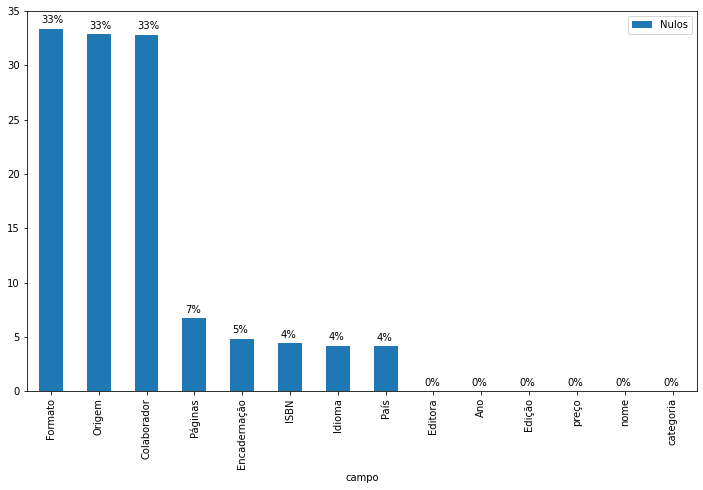

In [46]:
total = df.shape[0]
data = pd.DataFrame({},columns=["campo","Não nulos","Nulos"])
for i,campo in enumerate(df) :
    qtd_null = df[df[campo].isna()].shape[0]
    row = [campo,100,(qtd_null*100)/total]
    data.loc[i] = row

data = data.sort_values(by="Nulos",ascending=False)

g = data.plot.bar(x='campo',y='Nulos')
for index,value in enumerate(data['Nulos']):
    plt.text(index-0.2,value+0.5,f"{value:.0f}%")
plt.show()

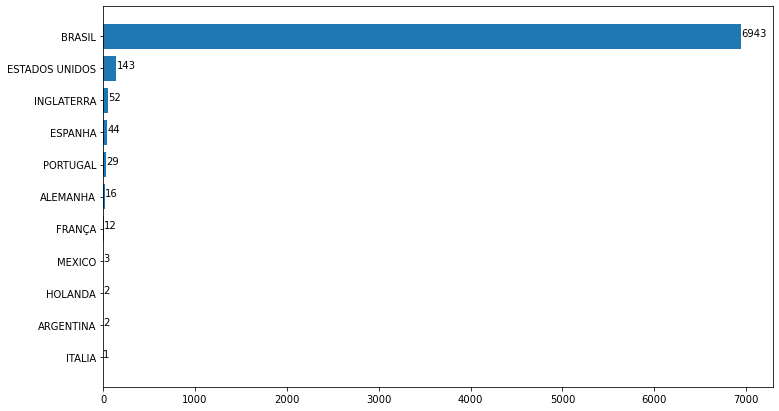

In [47]:
count_pais = df['País'].value_counts().reset_index(name='counts').sort_values(by='counts',ascending=True)
plt.barh(y='index',width='counts',data=count_pais)
for index,value in enumerate(count_pais['counts']):
    plt.text(value+0.5,index,f"{value:.0f}")
plt.show()

In [48]:
df[df['País'].isna()]

Colaborador              Editora        ISBN   Ano  Edição    Origem  \
122          NaN                Outra         NaN  2014       1       NaN   
130          NaN                Outra         NaN  2014       1       NaN   
161          NaN                Outra         NaN  2014       1       NaN   
171          NaN                Outra         NaN  2014       1       NaN   
197          NaN  MODERNA - DIDÁTICOS  851604338X  2004       3  Nacional   
...          ...                  ...         ...   ...     ...       ...   
7087         NaN                Outra         NaN  2014       1       NaN   
7101         NaN                Outra         NaN  2014       1       NaN   
7113         NaN                Outra         NaN  2014       1       NaN   
7160         NaN                Outra         NaN  2014       1       NaN   
7444         NaN                Outra         NaN  2014       1       NaN   

             Formato Encadernação Idioma País  Páginas   preço  \
122              NaN          NaN    NaN  NaN      NaN  135.45   
130              NaN          NaN    NaN  NaN      NaN   30.00   
161              NaN          NaN    NaN  NaN      NaN   19.90   
171              NaN          NaN    NaN  NaN      NaN   41.00   
197   LIVRO DIDÁTICO          NaN    NaN  NaN      NaN  101.20   
...              ...          ...    ...  ...      ...     ...   
7087             NaN          NaN    NaN  NaN      NaN   67.00   
7101             NaN          NaN    NaN  NaN      NaN   54.00   
7113             NaN          NaN    NaN  NaN      NaN   38.00   
7160             NaN          NaN    NaN  NaN      NaN  210.00   
7444             NaN          NaN    NaN  NaN      NaN   56.96   

                                                   nome  \
122                                          EARTH VIEW   
130   BRASIL - INDIA - AFRICA DO SUL - EMERGENCIA DO...   
161   RESUMÃO ESCOLAR  - HISTÓRIA DO BRASIL 3 - REPÚ...   
171               PRESTAMISTAS, COMERCIANTES E DOUTORES   
197                          ATLAS GEOGRAFICO ILUSTRADO   
...                                                 ...   
7087                                WINDOWS 98 + CD-ROM   
7101                                 CRIMINOSOS DO SEXO   
7113         DESENVOLVIMENTO E APLICAÇOES DE TECNOLOGIA   
7160                 PRINCÍPIOS DE ENGENHARIA AMBIENTAL   
7444                                   MONSIEUR LAMBERT   

                     categoria  
122                  Geografia  
130                   História  
161                   História  
171                   História  
197                  Geografia  
...                        ...  
7087  Informática e Tecnologia  
7101                       HQs  
7113  Informática e Tecnologia  
7160                Engenharia  
7444    Humor e Entretenimento  

[313 rows x 14 columns]

### Tratando os casos faltantes, Parece razoável assumir que os restantes também são do Brasil

In [49]:
df['País'] = df['País'].fillna('BRASIL')
df['Idioma'] = df['Idioma'].fillna('PORTUGUÊS')

## Analisando Colaborador

In [50]:
df['Colaborador'].value_counts()

Autor:VARIOS AUTORES                                                            29
Autor:VÁRIOS AUTORES                                                            24
Autor:EQUIPE COQUETEL                                                           22
Autor:MELHORAMENTOS                                                             14
Autor:VESTCON                                                                   13
                                                                                ..
Autor:FEXEUS, HENRIK|Tradutor:HENRIQUES, DANIELA BARBOSA                         1
Introdução:GAIMAN, NEIL|Autor:HERBERT, FRANK|Tradutor:ZANINI, MARIA DO CARMO     1
Autor:PIERS, HELEN|Autor:SUTTON, KATE                                            1
Autor:SANTOS, ANDRE                                                              1
Autor:DAMIANI, AMELIA LUISA                                                      1
Name: Colaborador, Length: 4373, dtype: int64

### Filtrando apenas autores e mudando formato do nome para nome e sobrenome

In [51]:
def minerarAutores(df):
    a = df[df['Colaborador'].notna() & df['Colaborador'].str.contains(pat='Autor:')]['Colaborador']
    c = 0
    for i,row in a.iteritems():
        colaboradores = df.loc[i,'Colaborador']
        autores_list = []
        for colaborador in colaboradores.split("|"):
            if 'Autor:' in colaborador:
                autor = colaborador.replace("Autor:","")
                if ", " in autor:
                    nomes = autor.split(", ",1)
                    autor = nomes[1]+" "+nomes[0]
                autores_list.append(unidecode(autor.strip()))
        autores_list.sort()
        if len(autores_list) > 0:
            autores = "; ".join(autores_list)
            df.loc[i,'Autores'] = autores
    df['Autores'] = df['Autores'].fillna('Desconhecido')

In [52]:
minerarAutores(df)
df = df.drop('Colaborador',axis=1)
minerarAutores(df_raw)
df_raw = df_raw.drop('Colaborador',axis=1)

## Tratando ISBN

In [53]:
df['ISBN'] = df['ISBN'].fillna('0')

## Tratando Encadernação

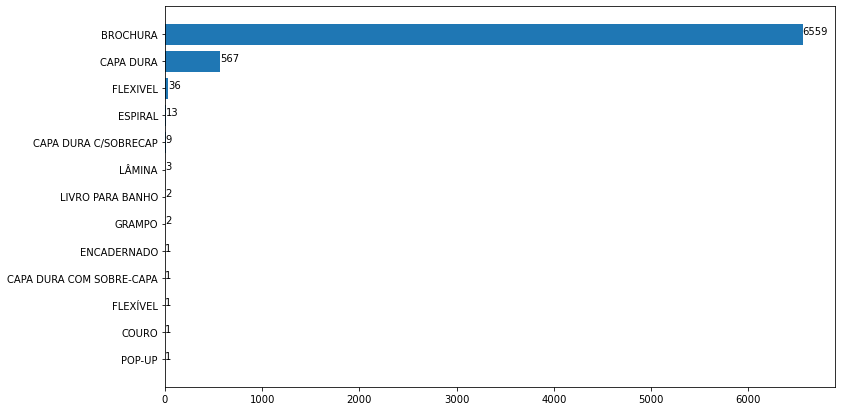

In [54]:
count_encadernacao = df['Encadernação'].value_counts().reset_index(name='counts').sort_values(by='counts',ascending=True)
plt.barh(y='index',width='counts',data=count_encadernacao)
for index,value in enumerate(count_encadernacao['counts']):
    plt.text(value+0.5,index,f"{value:.0f}")
plt.show()

### Parece ser seguro chutar que seja o mais comum (BROCHURA)

In [55]:
df['Encadernação'] = df['Encadernação'].fillna(count_encadernacao.iloc[-1,:]['index'])

## Tratando número de páginas

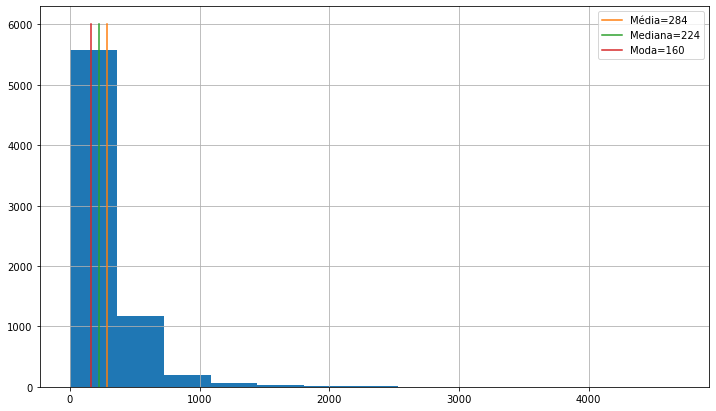

In [56]:
df['Páginas'].hist(bins=k)

x1 = [df['Páginas'].mean(),df['Páginas'].mean()]
y1 = [0,6000]
value = df['Páginas'].mean()
lb1 = f"Média={value:.0f}"
plt.plot(x1,y1,label = lb1) 


x2 = [df['Páginas'].median(),df['Páginas'].median()]
y2 = [0,6000]
value = df['Páginas'].median()
lb2 = f"Mediana={value:.0f}"
plt.plot(x2,y2,label = lb2) 


value = df['Páginas'].mode().item()
x3 = [value,value]
y3 = [0,6000]
lb3 = f"Moda={value:.0f}"
plt.plot(x3,y3,label = lb3) 
plt.legend()
plt.show()

### Independentemente da escolha entre média, mediana ou moda não mudará muito a distribuição. Então será usada a média destas medidas

<AxesSubplot:>

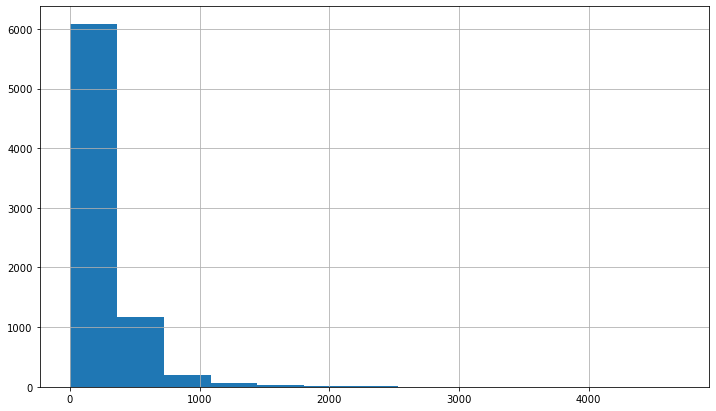

In [57]:
value = np.round((x1[0] + x2[0] + x3[0]) / 3)
df['Páginas'] = (df['Páginas'].fillna(value)).astype(int)
df['Páginas'].hist(bins=k)

## Analisando Formato

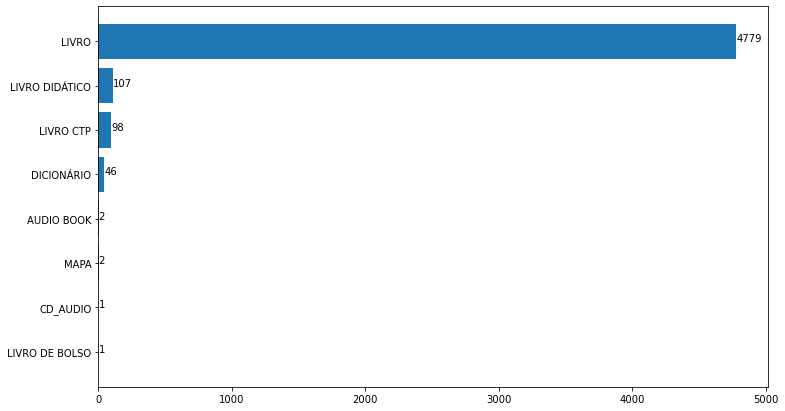

In [58]:
count_formato = df['Formato'].value_counts().reset_index(name='counts').sort_values(by='counts',ascending=True)
plt.barh(y='index',width='counts',data=count_formato)
for index,value in enumerate(count_formato['counts']):
    plt.text(value+0.5,index,f"{value:.0f}")
plt.show()

### Parece seguro afirmar que o formato é livro

<AxesSubplot:xlabel='Formato', ylabel='preço'>

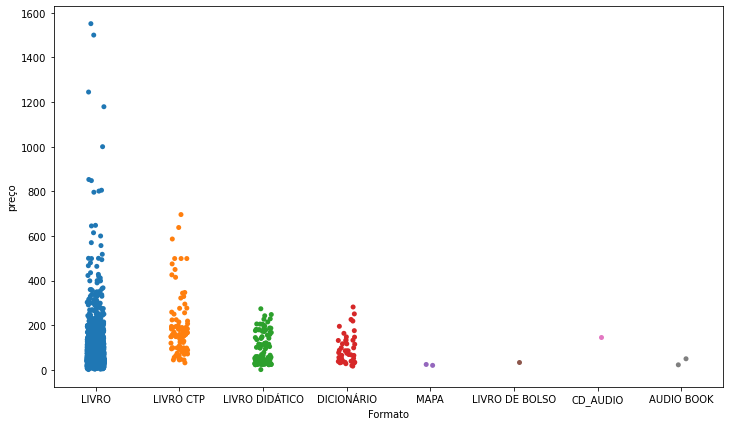

In [59]:
sns.stripplot(x="Formato", y="preço", data=df)

### Além disso, o formato não parece muito relevante para o preço

In [60]:
df = df.drop('Formato',axis=1)
df_raw = df_raw.drop('Formato',axis=1)

## Analisando Origem

In [61]:
df['Origem'].value_counts()

Nacional     4360
Usado         413
Importado     302
Name: Origem, dtype: int64

<AxesSubplot:xlabel='Origem', ylabel='preço'>

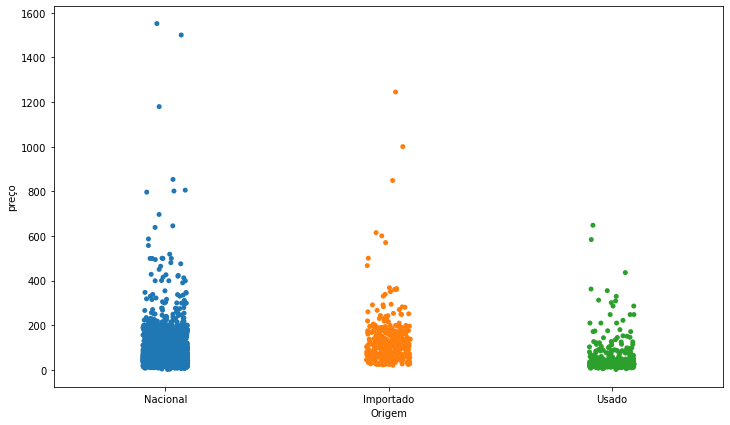

In [62]:
sns.stripplot(x="Origem", y="preço", data=df)

In [63]:
df.groupby(by=['País','Origem']).size()

País            Origem   
ALEMANHA        Importado      14
                Usado           2
ARGENTINA       Usado           2
BRASIL          Importado      40
                Nacional     4353
                Usado         379
ESPANHA         Importado      36
                Nacional        3
                Usado           4
ESTADOS UNIDOS  Importado     127
                Nacional        1
                Usado          15
FRANÇA          Importado      11
                Usado           1
HOLANDA         Importado       2
INGLATERRA      Importado      47
                Usado           5
ITALIA          Importado       1
MEXICO          Importado       1
                Usado           2
PORTUGAL        Importado      23
                Nacional        3
                Usado           3
dtype: int64

### Acredito que seja razoável inferir que livros de outros países sejam importados e os do Brasil são Nacionais.

In [64]:
df[(df['Origem'].isna()) & (df['País'] == 'BRASIL')] = df[(df['Origem'].isna()) & (df['País'] == 'BRASIL')].fillna('Nacional')
df[(df['Origem'].isna()) & (df['País'] != 'BRASIL')] = df[(df['Origem'].isna()) & (df['País'] != 'BRASIL')].fillna('Importado')

# Quais são os extremos?

In [65]:
df[df["preço"] == df["preço"].min()]

Editora        ISBN   Ano  Edição Origem Encadernação     Idioma    País  \
2262     CPB  8534514089  2013       1  Usado     BROCHURA  PORTUGUÊS  BRASIL   

      Páginas  preço                 nome  categoria         Autores  
2262      106   1.55  GRANDE ESPERANÇA, A  Didáticos  ELLEN G. WHITE

In [66]:
df[df["preço"] == df["preço"].max()]

Editora        ISBN   Ano  Edição    Origem Encadernação     Idioma  \
3739  MANOLE  8520451446  2017       1  Nacional    CAPA DURA  PORTUGUÊS   

        País  Páginas   preço                         nome categoria  \
3739  BRASIL     3586  1551.0  TRATADO DE RADIOLOGIA (KIT)  Medicina   

                                                Autores  
3739  CLAUDIA DA COSTA LEITE; GIOVANNI GUIDO CERRI; ...

# Verificando nova proporção de nulos

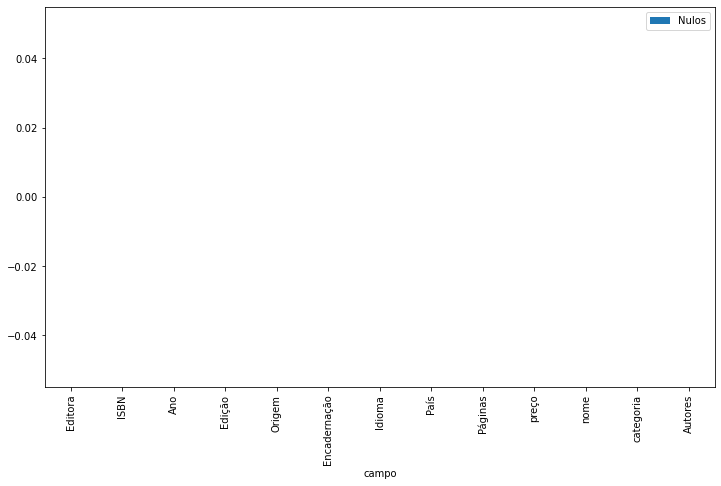

In [67]:
total = df.shape[0]
data = pd.DataFrame({},columns=["campo","Não nulos","Nulos"])
for i,campo in enumerate(df) :
    qtd_null = df[df[campo].isna()].shape[0]
    row = [campo,100,(qtd_null*100)/total]
    data.loc[i] = row

data = data.sort_values(by="Nulos",ascending=False)

g = data.plot.bar(x='campo',y='Nulos')
plt.show()

# Colocando Strings restantes para maiúsculo

In [68]:
def upperCase(df):
    df['Editora'] = df['Editora'].str.upper()
    df['Origem'] = df['Origem'].str.upper()
    df['Idioma'] = df['Idioma'].str.upper()
    df['País'] = df['País'].str.upper()
    df['nome'] = df['nome'].str.upper()
    df['categoria'] = df['categoria'].str.upper()
    df['Autores'] = df['Autores'].str.upper()

In [69]:
upperCase(df)
upperCase(df_raw)

# Amostra aleatória

In [70]:
df.sample()

Editora           ISBN   Ano  Edição    Origem Encadernação     Idioma  \
7260   OUTRA  9788528905199  2014       1  NACIONAL     BROCHURA  PORTUGUÊS   

        País  Páginas   preço                                           nome  \
7260  BRASIL      636  120.08  ELETRICIDADE GERAL: DISPOSITIVOS E APLICAÇÕES   

       categoria       Autores  
7260  ENGENHARIA  DESCONHECIDO

In [71]:
df.to_csv("final_dataset.csv",index=False)

In [72]:
df.shape

(7560, 13)

# Salvando dataset bruto (sem inferências de nulos)

In [73]:
df_raw.to_csv('raw_data.csv',index=False)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3917 entries, 0 to 7559
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Editora       3917 non-null   object 
 1   ISBN          3917 non-null   object 
 2   Ano           3917 non-null   float64
 3   Edição        3917 non-null   float64
 4   Origem        3917 non-null   object 
 5   Encadernação  3917 non-null   object 
 6   Idioma        3917 non-null   object 
 7   País          3917 non-null   object 
 8   Páginas       3917 non-null   float64
 9   preço         3917 non-null   float64
 10  nome          3917 non-null   object 
 11  categoria     3917 non-null   object 
 12  Autores       3917 non-null   object 
dtypes: float64(4), object(9)
memory usage: 588.4+ KB
